# Case study on regression
The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.


# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('car_age_price.csv')
data


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
data=pd.read_csv('car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# EDA


In [44]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [45]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [46]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,3.669643,18.366071
std,1.629616,9.271671
min,0.000000,0.000000
25%,2.000000,11.750000
50%,4.000000,21.000000
75%,4.000000,27.000000
max,7.000000,34.000000


# Boxplot

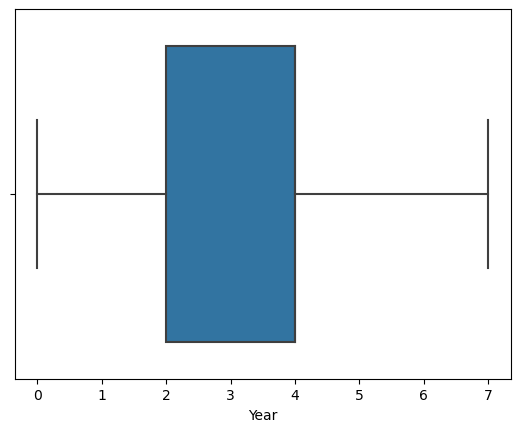

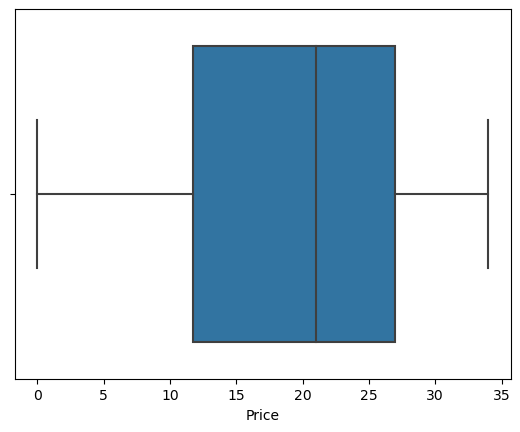

In [47]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# No outliers

# Regression Analysis

In [39]:

corr_matrix=data.corr()


plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='Accent')
plt.plot()

In [6]:
data.columns

Index(['Year', 'Price'], dtype='object')

# Assigning x value as year and y value as price


In [52]:
x = data.drop(['Price'], axis = 1)
y = data['Price']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(x_test,predictions)

[[ 1.43643129]
 [ 0.20363202]
 [ 0.82003166]
 [ 0.82003166]
 [ 0.82003166]
 [-1.02916725]
 [ 0.20363202]
 [ 0.82003166]
 [ 1.43643129]
 [ 1.43643129]
 [-2.26196651]
 [ 0.20363202]
 [-1.02916725]
 [ 2.05283092]
 [ 0.82003166]
 [ 1.43643129]
 [-2.26196651]
 [-1.02916725]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [-1.02916725]
 [-1.02916725]
 [-1.64556688]
 [-1.02916725]
 [ 0.20363202]
 [ 1.43643129]
 [ 0.82003166]
 [ 0.20363202]] [598895.38633194 505711.87168759 552303.62900976 552303.62900976
 552303.62900976 412528.35704324 505711.87168759 552303.62900976
 598895.38633194 598895.38633194 319344.84239888 505711.87168759
 412528.35704324 645487.14365411 552303.62900976 598895.38633194
 319344.84239888 412528.35704324 505711.87168759 505711.87168759
 505711.87168759 505711.87168759 505711.87168759 505711.87168759
 505711.87168759 505711.87168759 412528.35704324 412528.35704324
 365936.59972106 412528.35704324 5

# Finding error

In [76]:

from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 3962573261.894263
R squared value= 0.4887760028600362


# Standardisation

In [53]:
x.describe()

,Year
count,112.000000
mean,3.669643
std,1.629616
min,0.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,7.000000


In [54]:
x.head()

,Year
0,5
1,6
2,6
3,5
4,5


# Regression

In [55]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [57]:
x=std_scaler.fit_transform(x)
y=data['Price']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(x_test,predictions)

[[ 1.43643129]
 [ 0.20363202]
 [ 0.82003166]
 [ 0.82003166]
 [ 0.82003166]
 [-1.02916725]
 [ 0.20363202]
 [ 0.82003166]
 [ 1.43643129]
 [ 1.43643129]
 [-2.26196651]
 [ 0.20363202]
 [-1.02916725]
 [ 2.05283092]
 [ 0.82003166]
 [ 1.43643129]
 [-2.26196651]
 [-1.02916725]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]
 [ 0.20363202]] [29.89940674 20.45196711 25.17568693 25.17568693 25.17568693 11.00452748
 20.45196711 25.17568693 29.89940674 29.89940674  1.55708784 20.45196711
 11.00452748 34.62312656 25.17568693 29.89940674  1.55708784 11.00452748
 20.45196711 20.45196711 20.45196711 20.45196711 20.45196711]


In [60]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

Mean squared error= 48.44462451373819
R squared value= 0.4044339677488379


# Lasso Regression

In [65]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


data=pd.read_csv('car_age_price.csv')


In [67]:
x=std_scaler.fit_transform(x)
y=data['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [68]:
lasso = Lasso(alpha=1.0)

In [69]:
lasso.fit(x_train, y_train)


Lasso()

In [70]:
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

(0.4887809383759546, 0.6359978340326062)

# Since we got better scores in Lasso regression compared to Linear regression it is the better model


# Finding price of 2022 model using lasso regression

In [77]:
from sklearn.linear_model import Lasso


In [78]:
x=data.drop(['Price'],axis=1)
y=data['Price']



In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [81]:
lasso=Lasso()
model2=lasso.fit(x_train,y_train)
predictions=model2.predict(x_test)

In [82]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [83]:
print('slope:%.2f'%lasso.coef_[0])

slope:47608.16


In [84]:
print('intercept:%.2f'%lasso.intercept_)

intercept:-95520091.25


In [93]:
slope=47608.16

In [94]:
intercept= -95520091.25

In [90]:
def myfunc(x):
    return slope*x + intercept

In [95]:
price=myfunc(2022)

In [96]:
print(price)

743608.2700000107
